# Tarea 11

In [36]:
Pkg.add("PyPlot")
Pkg.add("SymPy")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [71]:
using PyPlot;
plt = PyPlot;
using SymPy;

## Ejercicio 1

In [55]:
function metodo_euler(f,x0,listh)
    #listh = linspace(t0,tf,(tf-t0)/h)
    x = x0
    S = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        x = x + h*f(x,i)
        push!(S,x)
    end
    listh, S
end

metodo_euler (generic function with 1 method)

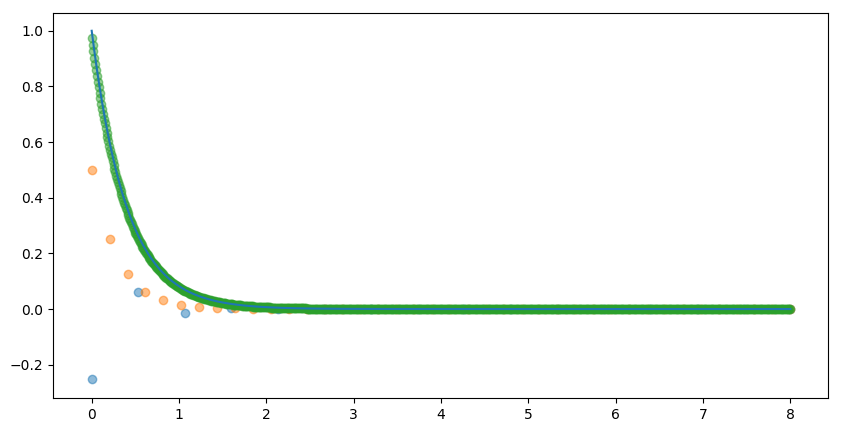

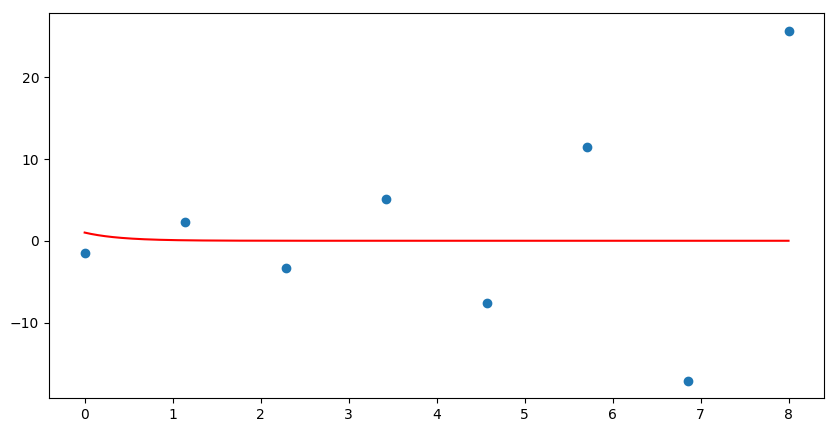

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x138b0f250>

In [59]:
#Condición inicial x0=1

A1,A2=metodo_euler((x,t)->-2.5x,1,linspace(0,8,8))
A3,A4=metodo_euler((x,t)->-2.5x,1,linspace(0,8,16))
A5,A6=metodo_euler((x,t)->-2.5x,1,linspace(0,8,40))
A7,A8=metodo_euler((x,t)->-2.5x,1,linspace(0,8,800))
eA7 = []
for i in A7
    push!(eA7,e^(-2.5i))
end
plt.figure(figsize=(10,5))
plt.scatter(A3,A4,alpha=0.5)
plt.scatter(A5,A6,alpha=0.5)
plt.scatter(A7,A8,alpha=0.5)
plt.plot(A7,eA7)

plt.figure(figsize=(10,5))
plt.scatter(A1,A2)
plt.plot(A7,eA7, color="red")

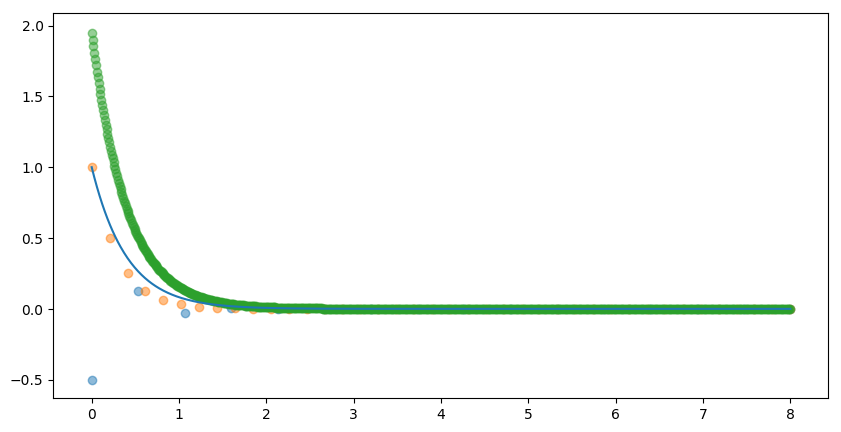

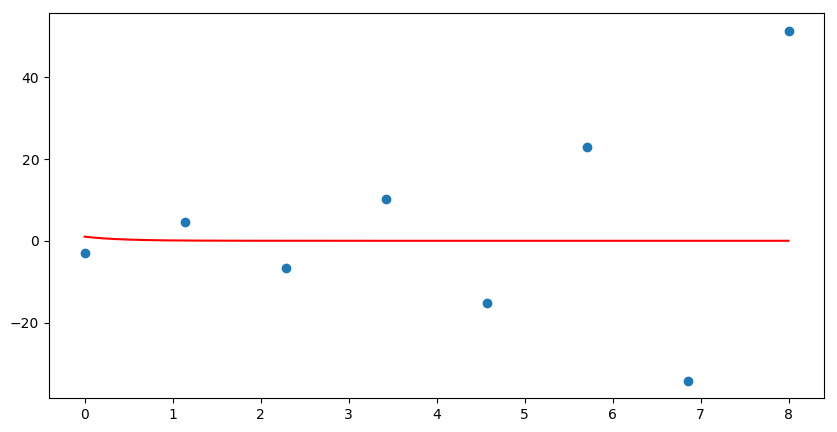

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x138f71310>

In [60]:
#Condición inicial x0=2

B1,B2=metodo_euler((x,t)->-2.5x,2,linspace(0,8,8))
B3,B4=metodo_euler((x,t)->-2.5x,2,linspace(0,8,16))
B5,B6=metodo_euler((x,t)->-2.5x,2,linspace(0,8,40))
B7,B8=metodo_euler((x,t)->-2.5x,2,linspace(0,8,800))
eB7 = []
for i in B7
    push!(eB7,e^(-2.5i))
end
plt.figure(figsize=(10,5))
plt.scatter(B3,B4,alpha=0.5)
plt.scatter(B5,B6,alpha=0.5)
plt.scatter(B7,B8,alpha=0.5)
plt.plot(B7,eB7)

plt.figure(figsize=(10,5))
plt.scatter(B1,B2)
plt.plot(B7,eB7, color="red")

## Ejercicio 2

Dicho sistema físico describe al oscilador armónico tipo resorte de Hooke, ya que indica que la fuerza que una partícula de masa $m$ siente es proporcional a su distancia con respecto al origen.

## Ejercicio 3

Si $u = x'(t)$, entonces $u'(t) = x''(t)$. Esto significa que la ecuación original cumple con dos condiciones:
1. $u(t) = x'(t)$
2. $u'(t) = -kx(t)$

## Ejercicio 4

In [44]:
function metodo_euler_2(f,CI,listh) #CI es arreglo con condiciones iniciales
    #listh = linspace(t0,tf,(tf-t0)/h)
    x=CI[1]
    u=CI[2]
    Sx = []
    Su = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        x = x + h*u
        u = u + h*f(i,x,u)
        push!(Sx,x)
        push!(Su,u)
    end
    listh, Sx, Su
end;

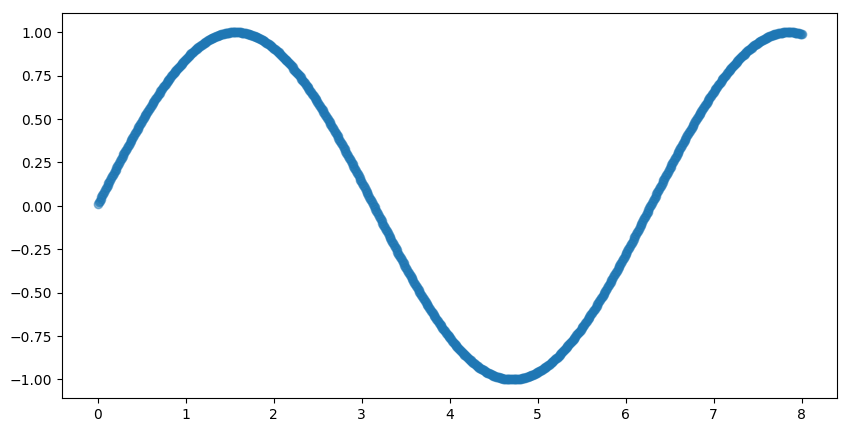

PyObject <matplotlib.collections.PathCollection object at 0x138d7be10>

In [81]:
A1,A2,A3=metodo_euler_2((i,x,u)-> -x,[0,1],linspace(0,8,800)) #La solución es la función sen(x)
plt.figure(figsize=(10,5))
plt.scatter(A1,A2,alpha=0.5)

## Ejercicio 5

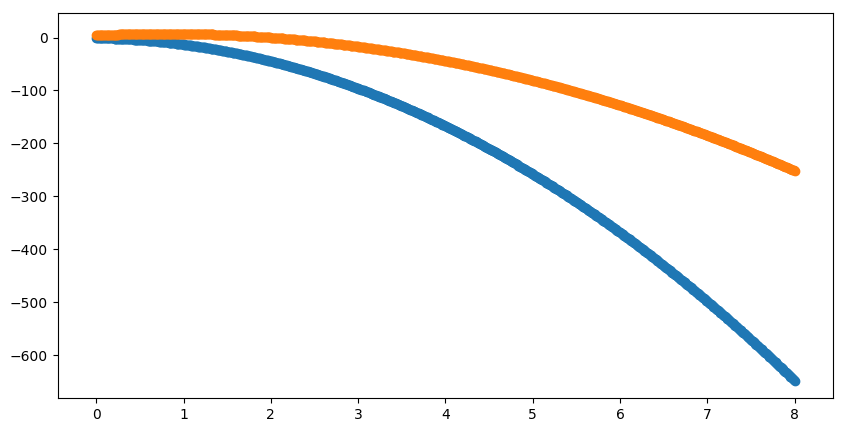

800-element Array{Float64,1}:
    4.0    
    4.06959
    4.13817
    4.20575
    4.27233
    4.33791
    4.40248
    4.46605
    4.52862
    4.59019
    4.65075
    4.71031
    4.76887
    ⋮      
 -252.021  
 -252.741  
 -253.462  
 -254.185  
 -254.908  
 -255.633  
 -256.358  
 -257.084  
 -257.812  
 -258.54   
 -259.27   
 -260.0    

In [80]:
T,X=metodo_euler((x,t)->(2x-18t)/(1+t),-1,linspace(0,8,800))
F=[]
for i in T
    push!(F,4+8i-5i^2)
end
plt.figure(figsize=(10,5))
plt.scatter(T,X)
plt.scatter(T,F)
F-T #Error conforme aumenta t